<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Creating Visualizations Using Matplotlib, Seaborn, and Folium in Python

**Provider:** IBM (Data Analyst Professional Certificate, Coursera)

As part of IBM's Data Analyst curriculum, I completed the **Final Assignment** on **Data Visualization using Python and its libraries**, a crucial step in creating accurate, informative, and visually appealing representations of data. This project demonstrates techniques to explore datasets, generate insights, and communicate findings effectively using **Matplotlib**, **Seaborn**, and **Folium**.  

The project focuses on:  

- Designing clear and meaningful charts to understand data distributions and trends.  
- Using Seaborn for statistical visualizations and advanced plotting techniques.  
- Creating interactive maps with Folium to visualize geospatial data.  
- Enhancing visualizations for readability, storytelling, and decision-making.  

This hands-on assignment showcases the ability to translate complex datasets into intuitive visuals that support data-driven analysis and reporting.


# Objectives

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations


# Setup


For this lab, i will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*  [`Folium`](https://python-visualization.github.io/folium/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run these notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


In [4]:
%pip install seaborn
%pip install folium


Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries

importing all required libraries in one place:


In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

---


# Scenario

In this assignment i will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, i aim to gain insights into how recessions impacted automobile sales for my company.


---


# Importing Data


In [7]:
import requests
import io
import pandas as pd

# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch the data from the URL
response = requests.get(URL)

# Raise an error if the request failed
response.raise_for_status()

# Convert the response content into a readable format for pandas
csv_content = io.StringIO(response.text)

# Read the CSV data into a pandas dataframe
df = pd.read_csv(csv_content)

# Print confirmation
print('Data downloaded and read into a dataframe!')

# Show the first few rows of the dataframe
print(df.head())


Data downloaded and read into a dataframe!
        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Aut

In [8]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [9]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


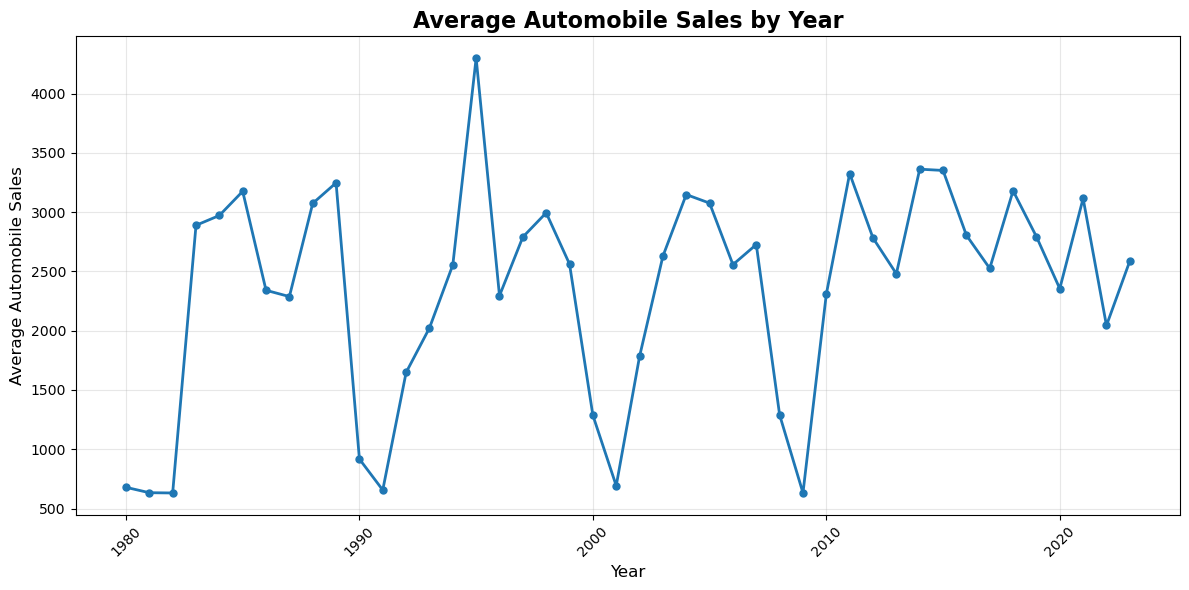

In [10]:
# Group by year and calculate average automobile sales
yearly_sales = df.groupby('Year')['Automobile_Sales'].mean()

# Create line chart using pandas plot functionality
yearly_sales.plot(kind='line', 
                  figsize=(12, 6),
                  marker='o',
                  linewidth=2,
                  markersize=5)

# Add labels and title
plt.title('Average Automobile Sales by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Automobile Sales', fontsize=12)

# Improve the appearance
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

---



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


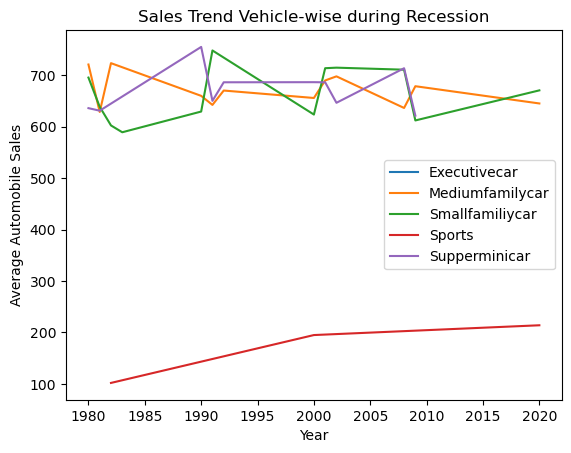

In [14]:
        # Task 1.2: Plot different lines for categories of vehicle type during recession periods

df_rec = df[df['Recession']==1]
df_Mline = df_rec.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

<details>
    <summary>Click here for Solution template</summary>

```python
    df_rec = df[df['Recession']==1]
    df_Mline = df_rec.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
    df_Mline.set_index('Year', inplace=True)
    df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
    df_Mline.plot(kind='line')
    plt.xlabel('..............')
    plt.ylabel('............')
    plt.title('Sales Trend Vehicle-wise during Recession')
    plt.legend()
    plt.show()

```
</details>


#### From the above plot, what insights have you gained on the sales of various vehicle types?<br> Type in your answer below:

**ANSWER:** During recessions, sports cars have significantly lower and more vulnerable sales (~100-220) compared to family/practical vehicles which maintain stable higher sales (600-750), showing consumers prioritize necessity over luxury during economic downturns.


----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


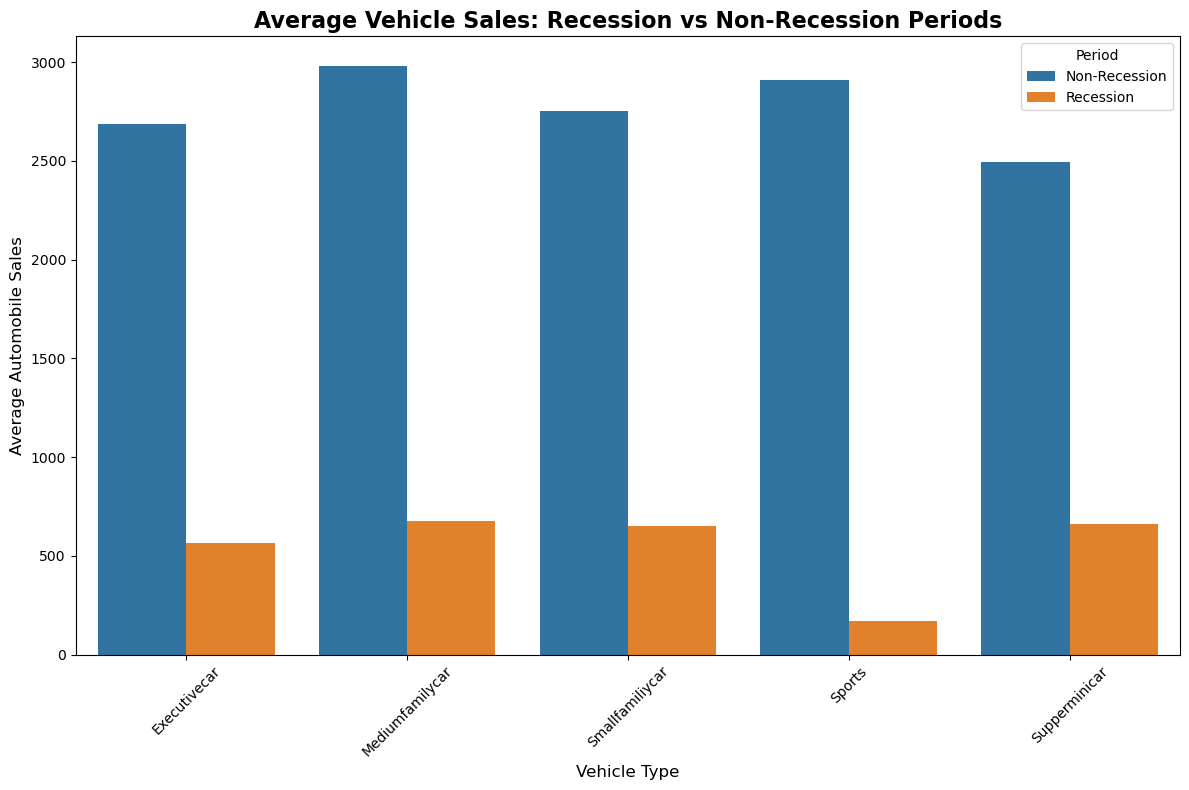

In [19]:
# Group by Recession and Vehicle_Type, calculate average Automobile_Sales
recession_comparison = df.groupby(['Recession', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Create a more readable Recession column for plotting
recession_comparison['Period'] = recession_comparison['Recession'].map({0: 'Non-Recession', 1: 'Recession'})

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Period', data=recession_comparison)

# Add labels and title
plt.title('Average Vehicle Sales: Recession vs Non-Recession Periods', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Average Automobile Sales', fontsize=12)

# Improve readability
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()

# Show the plot
plt.show()

#### From the above chart what insights have you gained on the overall sales of automobiles during recession? 


ANSWER: All vehicle types experience significant sales declines during recessions, with luxury vehicles (Sports cars, Executive cars) being hit hardest while family cars show relatively better resilience, indicating consumers prioritize essential transportation over premium purchases during economic downturns.

---


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, i want to find more insights from the data to understand the reason. <br>Ploting a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 


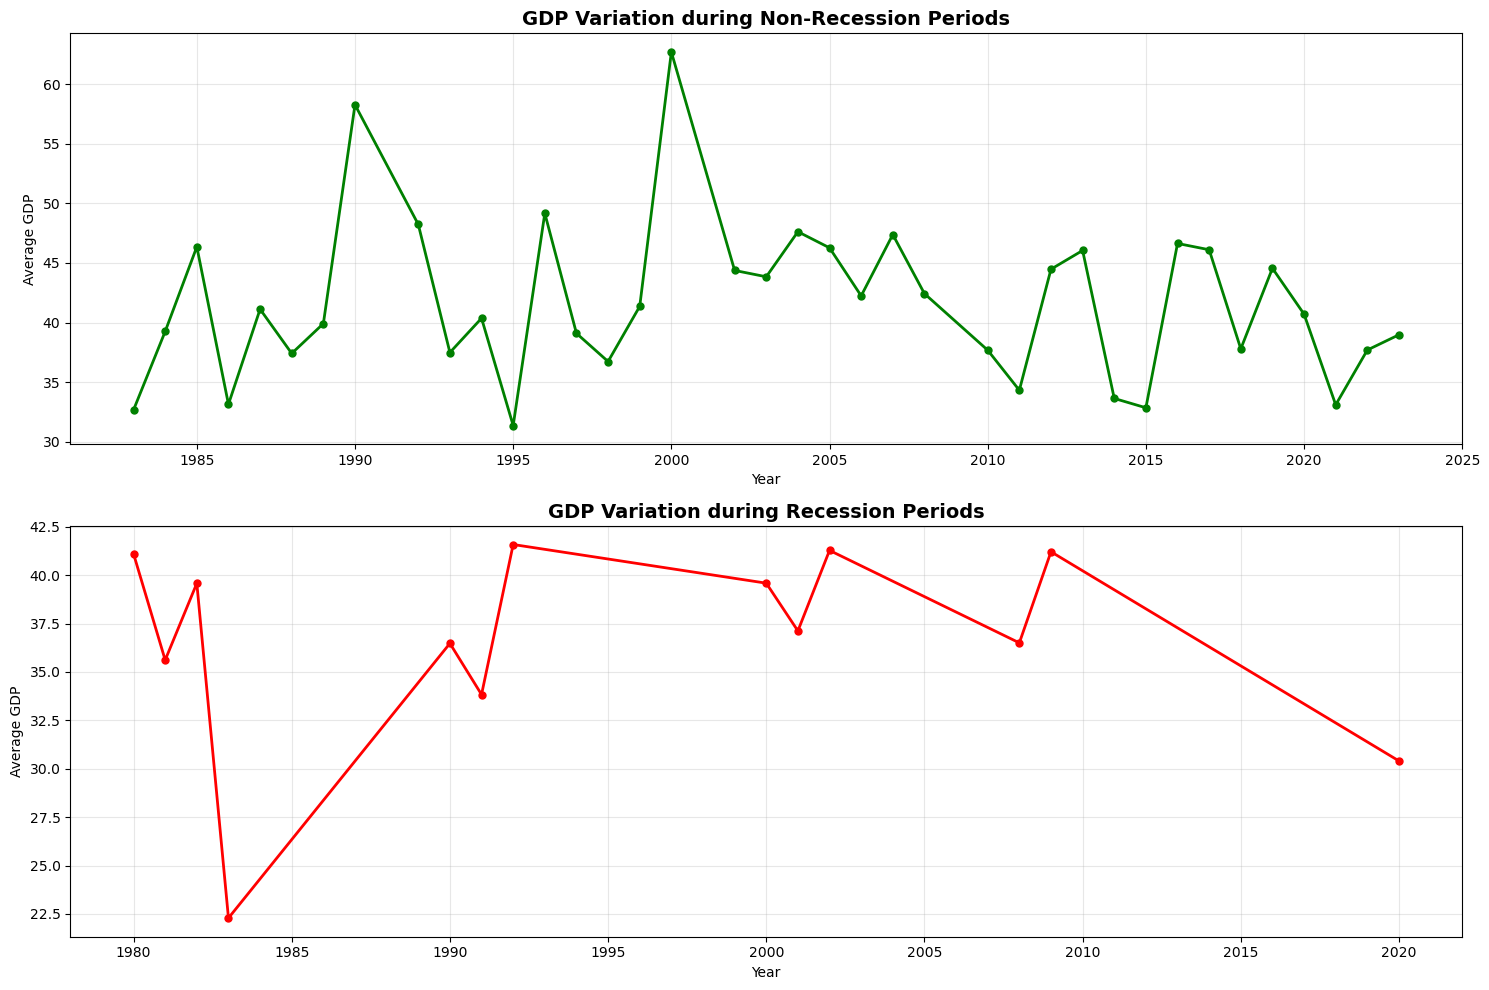

In [20]:
# Task 1.4: Use subplotting to compare GDP variations during recession and non-recession periods

# Separate data for recession and non-recession periods
recession_data = df[df['Recession'] == 1]
non_recession_data = df[df['Recession'] == 0]

# Group by year and calculate average GDP for each period
gdp_recession = recession_data.groupby('Year')['GDP'].mean()
gdp_non_recession = non_recession_data.groupby('Year')['GDP'].mean()

# Create figure with subplots
fig = plt.figure(figsize=(15, 10))

# Subplot 1: GDP during Non-Recession periods
ax1 = fig.add_subplot(2, 1, 1)
gdp_non_recession.plot(kind='line', marker='o', linewidth=2, markersize=5, color='green', ax=ax1)
ax1.set_title('GDP Variation during Non-Recession Periods', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average GDP')
ax1.grid(True, alpha=0.3)

# Subplot 2: GDP during Recession periods
ax2 = fig.add_subplot(2, 1, 2)
gdp_recession.plot(kind='line', marker='o', linewidth=2, markersize=5, color='red', ax=ax2)
ax2.set_title('GDP Variation during Recession Periods', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average GDP')
ax2.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

### Interpretation
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company<br><br>


---


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


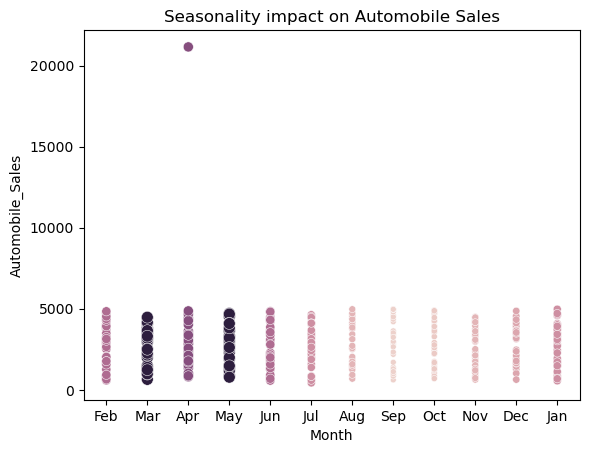

In [23]:
# Task 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales

non_rec_data = df[df['Recession'] == 0]

size = non_rec_data['Seasonality_Weight']  # for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

### Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April<br><br>


---


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'
 


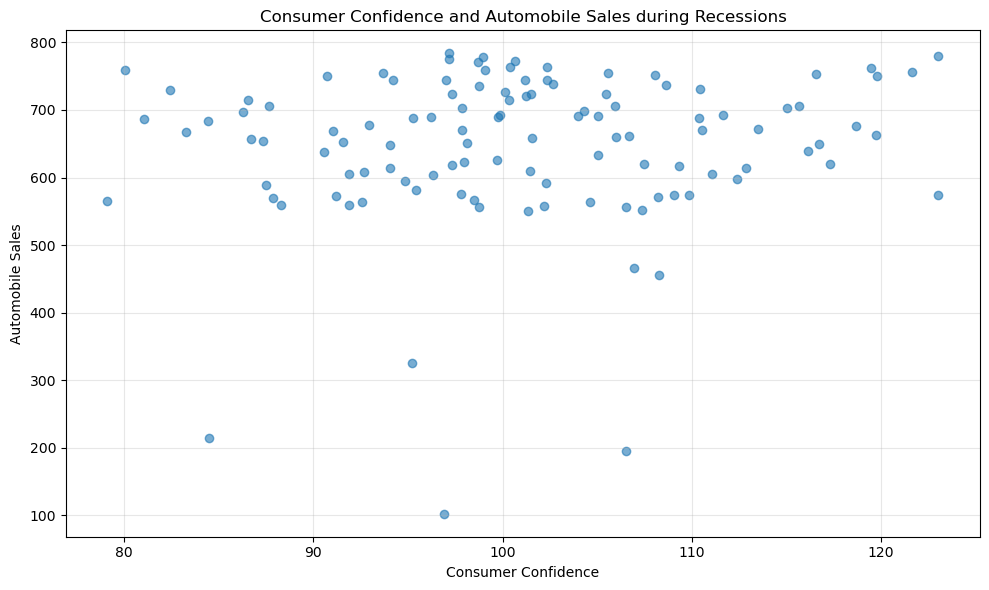

In [27]:
# Task 1.6: Scatter plot to identify correlation between consumer confidence and automobile sales during recessions

# Create dataframe where recession is '1'
recession_data = df[df['Recession'] == 1]

# Create scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Consumer_Confidence'], recession_data['Automobile_Sales'], alpha=0.6)

# Add labels and title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

# Add grid for better readability
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


 ### How does the average vehicle price relate to the sales volume during recessions?
 ANSWER: During recessions, consumer confidence ranges from 80-120, but automobile sales remain relatively clustered between 500-800 units regardless of confidence levels, indicating that consumer confidence has minimal to no impact on actual sales volume during economic downturns, suggesting other factors like financial constraints override confidence levels.

----


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


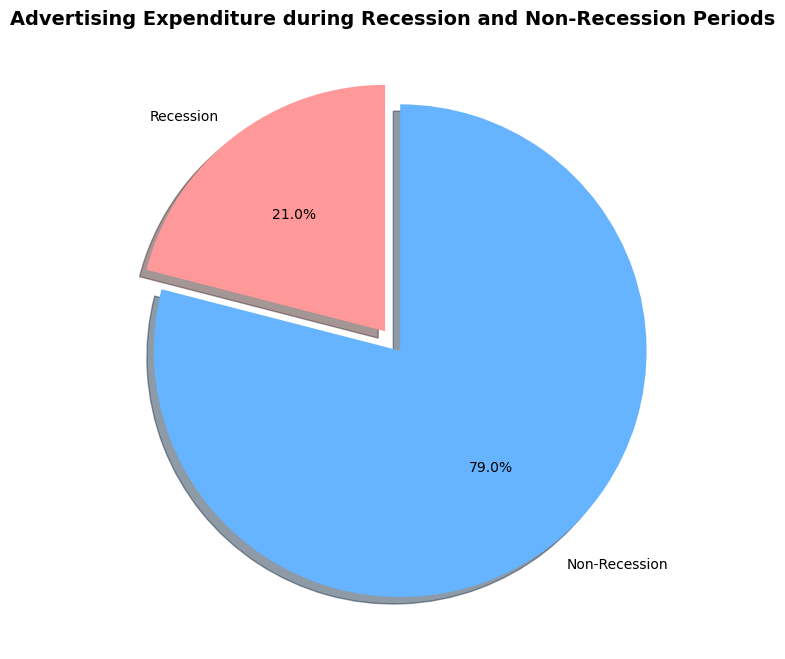

In [31]:
# Task 1.7: Create a pie chart to display advertising expenditure during recession and non-recession periods

# Create two dataframes for recession and non-recession periods
recession_df = df[df['Recession'] == 1]
non_recession_df = df[df['Recession'] == 0]

# Calculate the sum of Advertising_Expenditure for both periods
recession_ad_expenditure = recession_df['Advertising_Expenditure'].sum()
non_recession_ad_expenditure = non_recession_df['Advertising_Expenditure'].sum()

# Create data for pie chart
expenditure_values = [recession_ad_expenditure, non_recession_ad_expenditure]
labels = ['Recession', 'Non-Recession']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(expenditure_values, 
        labels=labels, 
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999', '#66b3ff'],
        explode=(0.05, 0.05),
        shadow=True)

# Add title
plt.title('Advertising Expenditure during Recession and Non-Recession Periods', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

#### From the above plot, what insights do we find on the advertisement expenditure during recession and non recession periods?<br> 


ANSWER: Advertising expenditure is significantly lower during recession periods (21%) compared to non-recession periods (79%), indicating that companies cut back on marketing investments in economic downturns.



---


### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


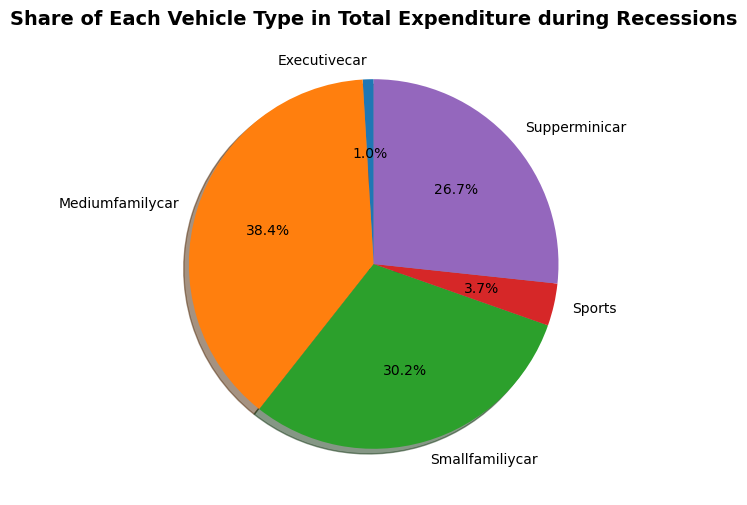

In [32]:
# Filter data for recession period only
recession_data = df[df['Recession'] == 1]

# Group by vehicle type and sum advertisement expenditure
ad_exp_by_vehicle = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Plot pie chart
plt.figure(figsize=(8,6))
plt.pie(ad_exp_by_vehicle, labels=ad_exp_by_vehicle.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions', fontsize=14, fontweight='bold')
plt.show()


### Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!<br><br>


----


 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### i will create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


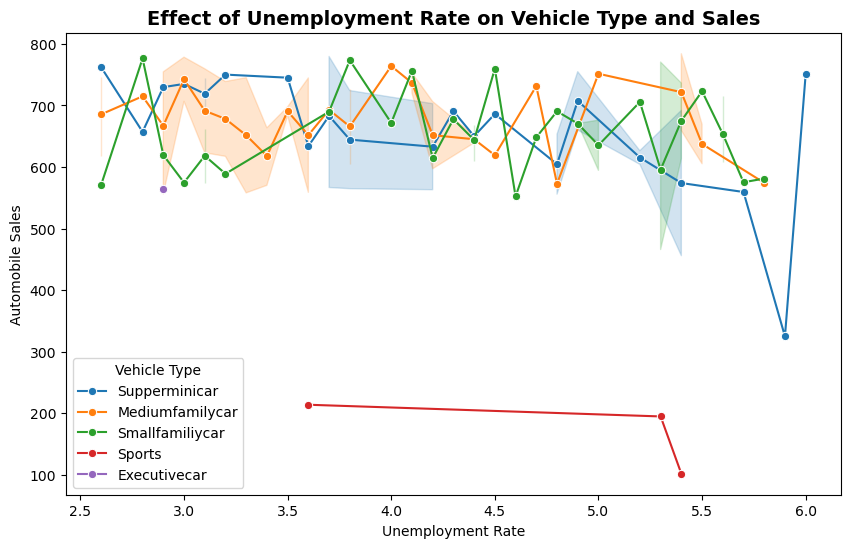

In [33]:
# Filter data for recession period only
recession_data = df[df['Recession'] == 1]

# Create lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=recession_data, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', marker='o')

# Title and labels
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales', fontsize=14, fontweight='bold')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type')
plt.show()


<details>
    <summary>Click here for Solution template</summary>

```python
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='..........', y='.........',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
```

</details>


#### From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?<br>

ANSWER: Medium and small family cars stayed stable during recessions, while superminicars generally declined with rising unemployment but spiked sharply at 6%, likely reflecting a consumer shift to more affordable vehicles under severe economic strain.



## Data Analyst


Karo Bakhtiyar

``` toggle ## Change Log
```


PROVIDED BY IBM!

Copyright © 2023 IBM Corporation. All rights reserved.
